## Importing Libraries and Configurations

In [ ]:
import tensorflow as tf### models
import pandas as pd ### reading and processing data
import seaborn as sns ### visualization
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import split_dataset, plot_model

## Loading Dataset and EDA

In [ ]:
raw_data = pd.read_csv("used_cars_train.csv")
raw_data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [ ]:
raw_data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [ ]:
tensor_data = tf.constant(raw_data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [ ]:
tensor_data = tf.random.shuffle(tensor_data)

In [ ]:
X = tensor_data[:,3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y, axis=-1)
X.shape, Y.shape, tensor_data.shape, len(X)

(TensorShape([1000, 8]), TensorShape([1000, 1]), TensorShape([1000, 12]), 1000)

## Creating Training, Validation and Test sets

In [ ]:
TRAIN_RATIO = 0.75
VAL_RATIO = 0.15
TEST_RATIO = 0.10
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(Y_train.shape)

(750, 8)
(750, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=10, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO))]
Y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO))]
print(X_val.shape)
print(Y_val.shape)

(150, 8)
(150, 1)


In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.shuffle(buffer_size=10, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO)):]
Y_test = Y[int(DATASET_SIZE*(VAL_RATIO+TRAIN_RATIO)):]
print(X_test.shape)
print(Y_test.shape)

(100, 8)
(100, 1)


In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = test_dataset.shuffle(buffer_size=10, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

## Modeling

In [ ]:
adapt_data = X_train
normalizer = Normalization(axis=-1)
normalizer.adapt(adapt_data)

In [ ]:
model = tf.keras.Sequential([InputLayer(input_shape=(8)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1)])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliz  (None, 8)                 17        
 ation)                                                          
                                                                 
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
______________

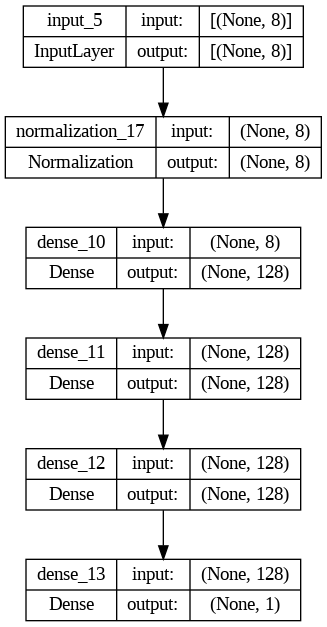

In [ ]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes=True)

## Error Sanctioning

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.1), loss = MeanAbsoluteError(), metrics = RootMeanSquaredError())

## Training and Optimization

In [ ]:
history = model.fit(train_dataset, validation_data = val_dataset,epochs=100, verbose = 1)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 158701.8594 - root_mean_squared_error: 207797.4375 - val_loss: 68093.3047 - val_root_mean_squared_error: 84893.0781
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 52237.2695 - root_mean_squared_error: 65836.9297 - val_loss: 68563.6641 - val_root_mean_squared_error: 85014.9062
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 49699.0078 - root_mean_squared_error: 61989.9570 - val_loss: 52322.0352 - val_root_mean_squared_error: 62865.9102
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 45072.4375 - root_mean_squared_error: 56063.1250 - val_loss: 46891.8477 - val_root_mean_squared_error: 57707.5039
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 38562.3984 - root_mean_squared_error: 48032.7656 - val_loss: 43667.2227 - val_root_mean_squared_error: 52586.8516
Epoch 6/100
24/24 [==============================] - 0s 3ms/ste

In [ ]:
history.history

{'loss': [158701.859375,
  52237.26953125,
  49699.0078125,
  45072.4375,
  38562.3984375,
  37277.32421875,
  38982.15625,
  38445.96875,
  38909.87890625,
  40821.1484375,
  38937.36328125,
  38886.78515625,
  37430.921875,
  39311.90234375,
  40199.67578125,
  37019.88671875,
  43387.91015625,
  35432.578125,
  40170.10546875,
  36477.625,
  40535.0703125,
  36610.90625,
  37228.515625,
  37121.00390625,
  35954.23046875,
  36488.73828125,
  38325.140625,
  37519.38671875,
  36799.03125,
  37348.80078125,
  41018.70703125,
  36735.359375,
  39668.7109375,
  34470.87890625,
  37839.7421875,
  36944.828125,
  34087.390625,
  34742.0625,
  37091.4375,
  36986.3828125,
  34063.609375,
  36430.1484375,
  36740.15625,
  37835.4140625,
  42778.8359375,
  36648.96484375,
  35594.5546875,
  33893.79296875,
  37649.8984375,
  33671.5078125,
  33899.8125,
  37038.109375,
  36629.44921875,
  36850.375,
  41011.82421875,
  35915.39453125,
  38732.0390625,
  38023.09765625,
  35888.1875,
  37846.

<function matplotlib.pyplot.show(close=None, block=None)>

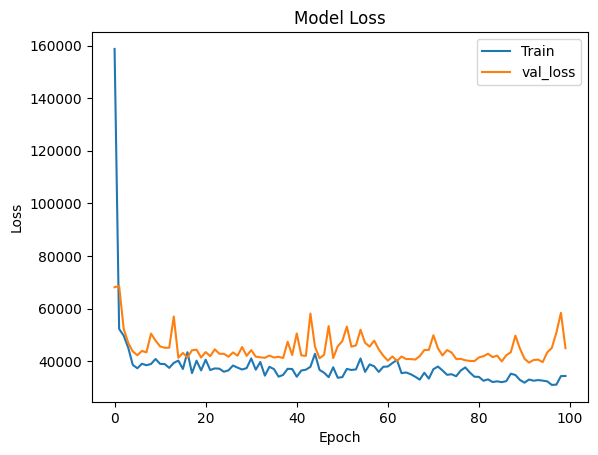

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','val_loss'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

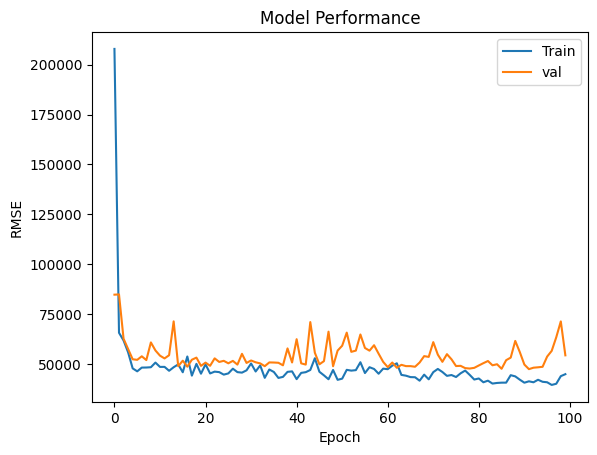

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Performance')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])
plt.show

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 5ms/step - loss: 47913.7500 - root_mean_squared_error: 59796.0469


[47913.75, 59796.046875]

In [ ]:
X_test.shape

TensorShape([100, 8])

In [ ]:
model.predict(X_test[0])

1/1 [==============================] - 0s 87ms/step


array([[281525.66]], dtype=float32)

In [ ]:
Y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([221692.], dtype=float32)>

In [ ]:
y_true = list(Y_test[:,0].numpy())

In [ ]:
y_pred = list(model.predict(X_test)[:,0])
print(y_pred)

4/4 [==============================] - 0s 3ms/step
[281525.62, 168020.12, 197133.67, 217417.33, 528126.2, 150824.17, 165667.25, 377352.94, 274688.38, 392368.1, 181757.94, 476169.06, 252596.03, 544990.06, 296908.75, 373557.6, 265819.12, 279877.56, 477359.6, 340036.6, 393725.2, 206444.38, 281695.38, 396834.88, 392196.66, 227026.78, 339207.53, 291404.25, 287299.7, 296094.7, 509491.3, 344918.3, 557691.4, 132830.56, 584335.56, 291999.25, 542868.44, 471345.28, 198746.62, 355094.28, 209522.34, 221605.69, 474714.0, 76452.375, 189137.16, 142013.88, 307103.25, 177534.6, 251070.97, 422292.84, 332996.56, 295474.97, 179029.44, 462530.88, 398048.34, 197200.81, 158389.6, 319757.4, 308476.3, 346386.03, 346170.56, 405589.53, 537211.2, 265447.25, 133473.62, 278284.44, 285168.75, 429872.5, 254114.78, 294973.3, 258660.5, 558300.1, 265041.94, 299627.0, 245331.16, 248827.0, 464785.62, 189610.34, 249866.1, 326876.75, 331381.06, 290430.72, 238084.47, 201535.53, 330030.12, 449552.62, 162999.81, 481698.72, 4687

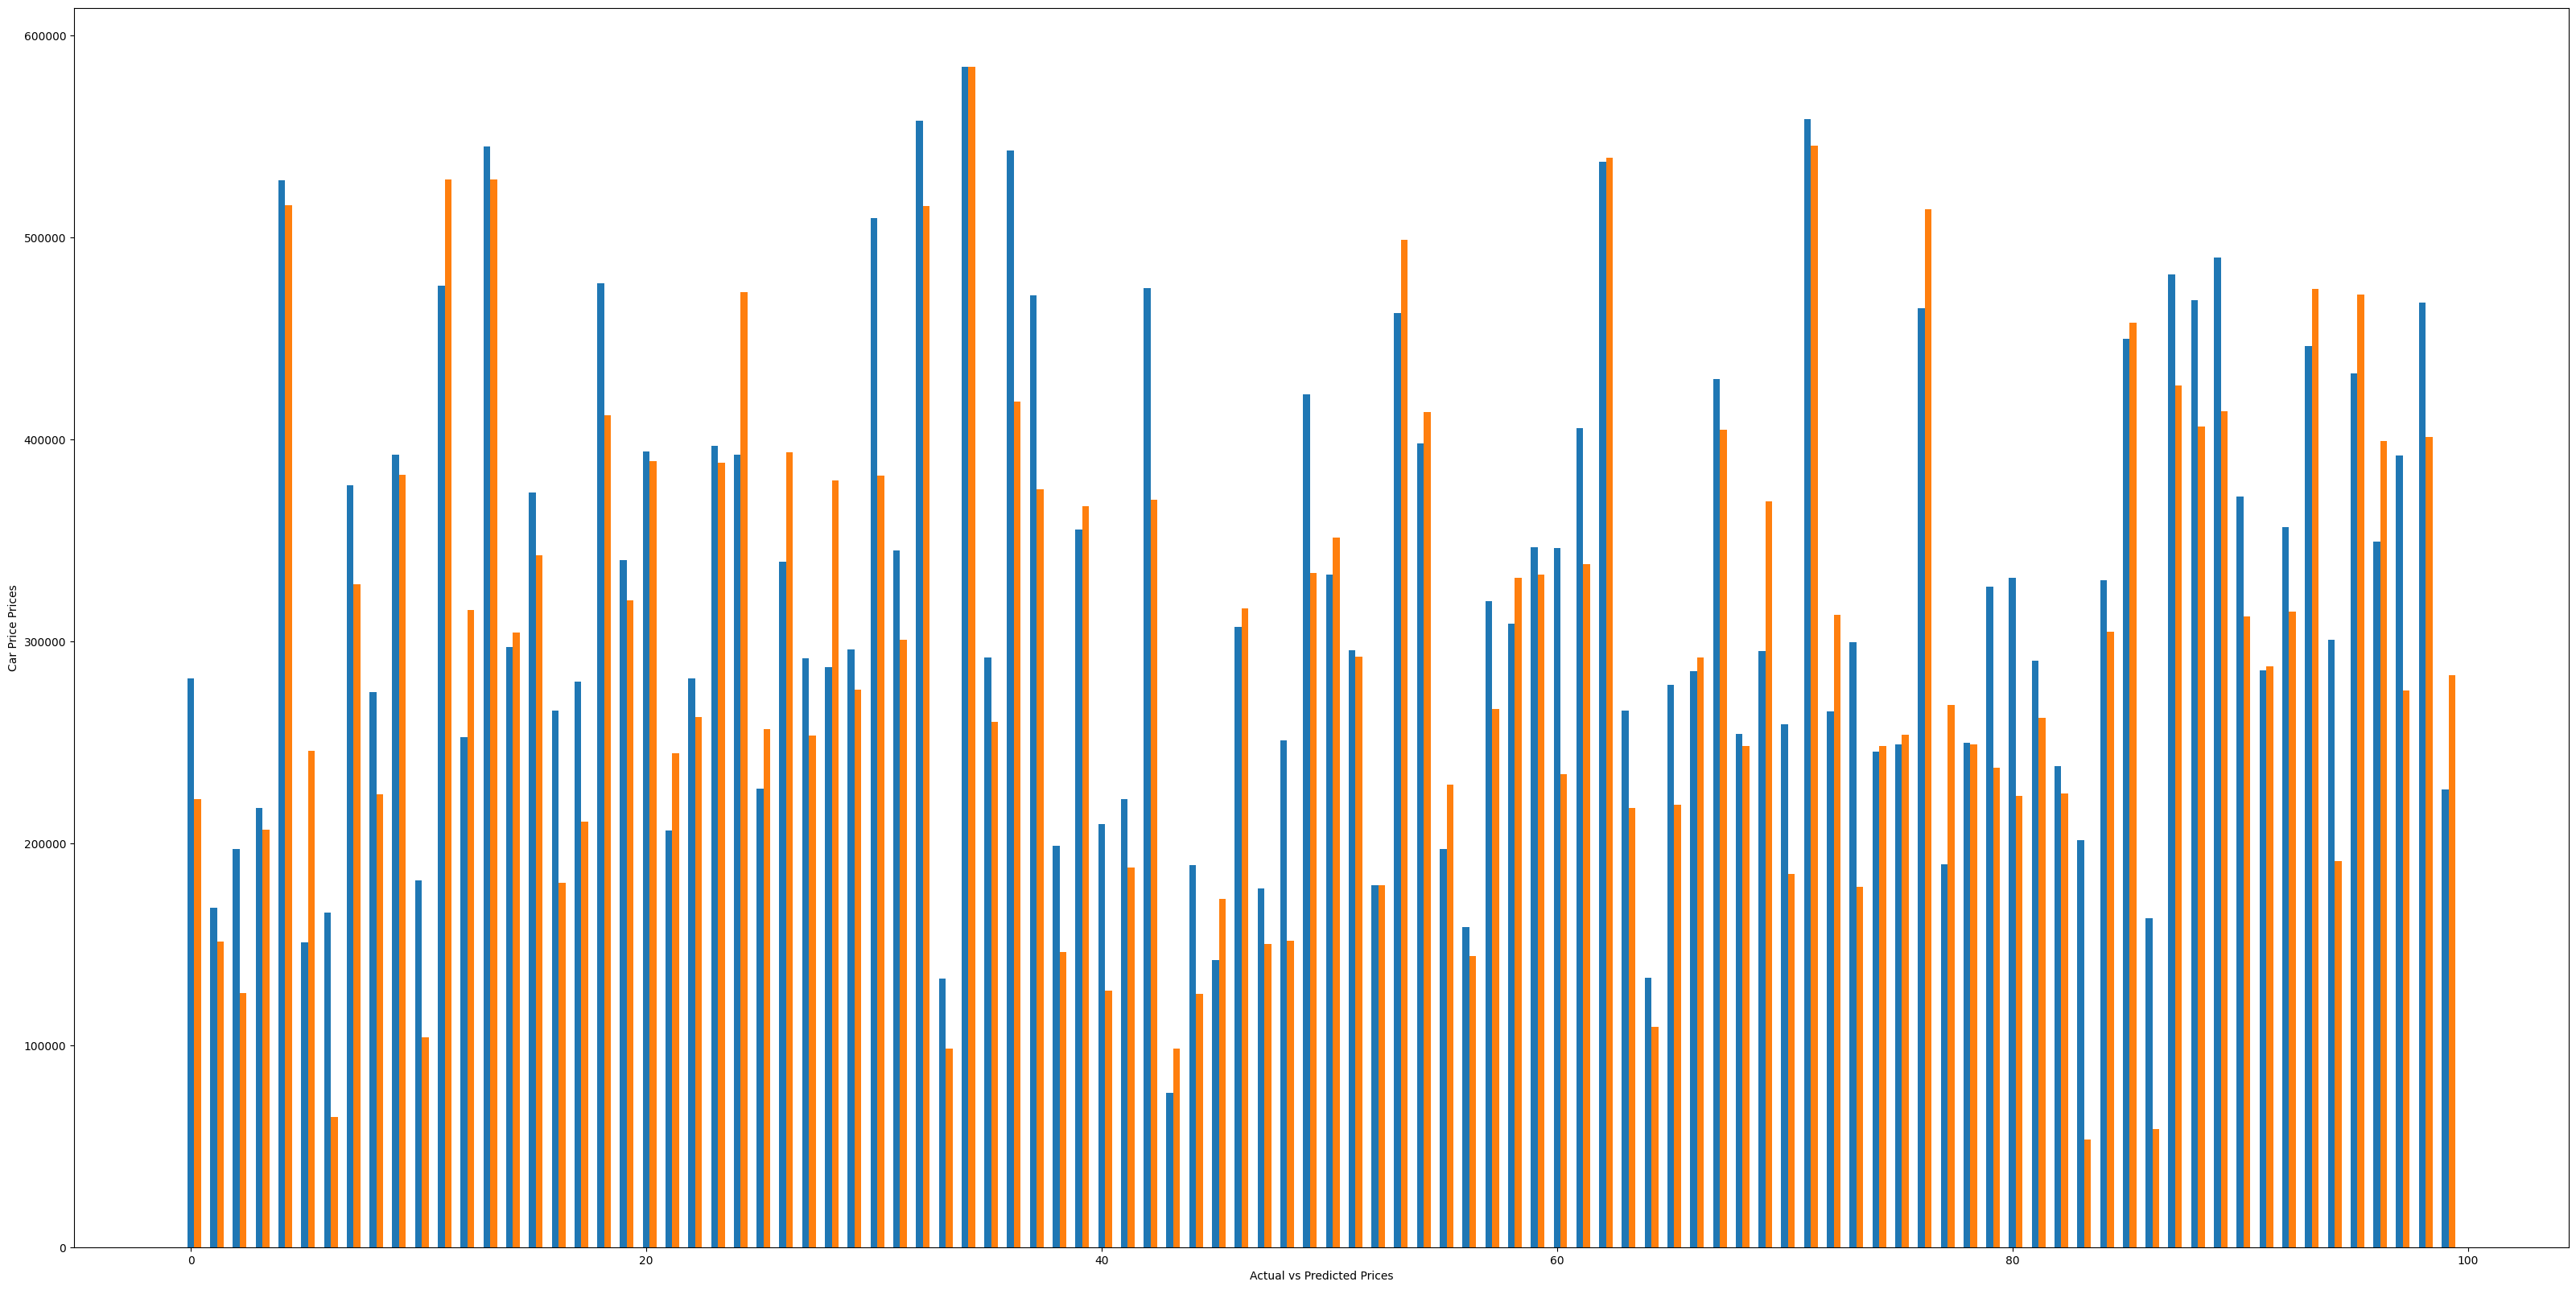

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.3

plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()